# Pokemon Challenge
### Доступны следующие данные:
https://www.kaggle.com/jonathanbouchet/pokemon-battles/data  

*1. Характеристики покемонов:*
   * '#'        - номер (идентификатор) покемона
   * Name       - имя покемона
   * Type 1     - первый (основной) тип покемона
   * Type 2     - второй (второстепенный) тип покемона
   * HP         - очки жизни
   * Attack     - очки стандартной атаки
   * Defense    - очки стандартной защиты
   * Sp. Atk    - очки специальной атаки 
   * Sp. Def    - очки специальной защиты
   * Speed      - скорость
   * Generation - номер поколения
   * Legendary  - принадлежность к легендарным покемонам 

*2. Информация о предыдущих боях:*
   * AtkP - номер (идентификатор) атакующего покемона
   * DefP - номер (идентификатор) защищающегося покемона
   * WinP - номер (идентификатор) покемона-победителя
   
Будем рассматривать первую таблицу, с помощью нее можно получить больше полезной информации

*Предсказание:*  
Попробуем предсказать легендарность покемона.  
Выбираем именно признак легендарности, так как он напрямую зависит от таких остальных параметров таблицы, как: очки жизни, атаки, защиты и скорости. Одним из критериев легендарности является сумма атрибутов данных параметров (должна быть 580 и больше). Таким образом, наиболее мощные покемоны зачастую являются легендарными.

# ДЗ №1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считаем данные из файла

In [2]:
dataInfoOrig = pd.read_csv('source/pokemon.csv', sep = ',', engine = 'python')
dataComb     = pd.read_csv('source/combats.csv', sep = ',', engine = 'python')
dataInfo     = pd.read_csv('source/pokemon.csv', sep = ',', engine = 'python')

Таблица dataInfo нужна для того, чтобы выводить результаты исследований без идентификатора покемона и его имени  
Поэтому удаляем столбцы # и Name из таблицы dataInfo2

In [3]:
dataInfo = dataInfo.drop("#", axis=1)

In [4]:
dataInfo = dataInfo.drop("Name", axis=1)

In [5]:
type(dataInfoOrig)

pandas.core.frame.DataFrame

In [6]:
type(dataComb)

pandas.core.frame.DataFrame

Выведем таблицу с исходными данными

In [7]:
dataInfoOrig

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


Выведем таблицу с удаленными столбцами идентификатора и имени

In [8]:
dataInfo

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,False
1,Grass,Poison,60,62,63,80,80,60,1,False
2,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False
5,Fire,NaN,58,64,58,80,65,80,1,False
6,Fire,Flying,78,84,78,109,85,100,1,False
7,Fire,Dragon,78,130,111,130,85,100,1,False
8,Fire,Flying,78,104,78,159,115,100,1,False
9,Water,NaN,44,48,65,50,64,43,1,False


Наша таблица dataInfo, с которой мы будем работать далее, содержит: 
* 800 строк
* 10 столбцов

In [9]:
print(dataInfo)

       Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0       Grass  Poison   45      49       49       65       65     45   
1       Grass  Poison   60      62       63       80       80     60   
2       Grass  Poison   80      82       83      100      100     80   
3       Grass  Poison   80     100      123      122      120     80   
4        Fire     NaN   39      52       43       60       50     65   
5        Fire     NaN   58      64       58       80       65     80   
6        Fire  Flying   78      84       78      109       85    100   
7        Fire  Dragon   78     130      111      130       85    100   
8        Fire  Flying   78     104       78      159      115    100   
9       Water     NaN   44      48       65       50       64     43   
10      Water     NaN   59      63       80       65       80     58   
11      Water     NaN   79      83      100       85      105     78   
12      Water     NaN   79     103      120      135      115   

Зададим для таблицы удобное название колонок

In [10]:
dataInfo.columns = [u'Type1', u'Type2', u'HP',    u'Attack',     u'Defence',
                    u'SpAtk', u'SpDef', u'Speed', u'Generation', u'Legendary']

Вывод первых 5 строк таблицы

In [11]:
dataInfo.head()

,Type1,Type2,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,False
1,Grass,Poison,60,62,63,80,80,60,1,False
2,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False


Вывод последних 5 строк таблицы

In [12]:
dataInfo.tail()

,Type1,Type2,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
795,Rock,Fairy,50,100,150,100,150,50,6,True
796,Rock,Fairy,50,160,110,160,110,110,6,True
797,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Psychic,Dark,80,160,60,170,130,80,6,True
799,Fire,Water,80,110,120,130,90,70,6,True


Вывод размера данных и названий столбцов

In [13]:
print(dataInfo.shape)
print(dataInfo.columns)

(800, 10)
Index(['Type1', 'Type2', 'HP', 'Attack', 'Defence', 'SpAtk', 'SpDef', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')


800 - количество строк таблицы  
10  - количество столбцов таблицы

In [14]:
dataInfo.index

RangeIndex(start=0, stop=800, step=1)

Выведем общую информацию по данным из таблицы

In [15]:
dataInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
Type1         800 non-null object
Type2         414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defence       800 non-null int64
SpAtk         800 non-null int64
SpDef         800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(2)
memory usage: 57.1+ KB


Обращение к данным (представлены разные способы)

In [16]:
dataInfo.at[1, 'Type1']

'Grass'

In [17]:
dataInfo['Type1']

0         Grass
1         Grass
2         Grass
3         Grass
4          Fire
5          Fire
6          Fire
7          Fire
8          Fire
9         Water
10        Water
11        Water
12        Water
13          Bug
14          Bug
15          Bug
16          Bug
17          Bug
18          Bug
19          Bug
20       Normal
21       Normal
22       Normal
23       Normal
24       Normal
25       Normal
26       Normal
27       Normal
28       Poison
29       Poison
         ...   
770       Fairy
771    Fighting
772    Electric
773        Rock
774      Dragon
775      Dragon
776      Dragon
777       Steel
778       Ghost
779       Ghost
780       Ghost
781       Ghost
782       Ghost
783       Ghost
784       Ghost
785       Ghost
786       Ghost
787       Ghost
788         Ice
789         Ice
790      Flying
791      Flying
792       Fairy
793        Dark
794      Dragon
795        Rock
796        Rock
797     Psychic
798     Psychic
799        Fire
Name: Type1, Length: 800

Значение в ячейке таблицы в 7ой строке столбца Type1

In [18]:
dataInfo['Type1'][7]

'Fire'

Выведем типы данных

In [19]:
dataInfo['Legendary'].dtype.name

'bool'

In [20]:
type(dataInfo['Legendary'])

pandas.core.series.Series

In [21]:
dataInfo[['Type1', 'HP']].head()

,Type1,HP
0,Grass,45
1,Grass,60
2,Grass,80
3,Grass,80
4,Fire,39


# Вывод статистических данных

Выведем статистические данные по количественным признакам (HP, Attack, Defence, Sp. Atk, Sp. Def, Speed, Generation)

In [22]:
dataInfo.describe()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Выведем статистические данные по всем признакам

In [23]:
dataInfo.describe(include = 'all')

,Type1,Type2,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
count,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


Вывод матрицы ковариаций

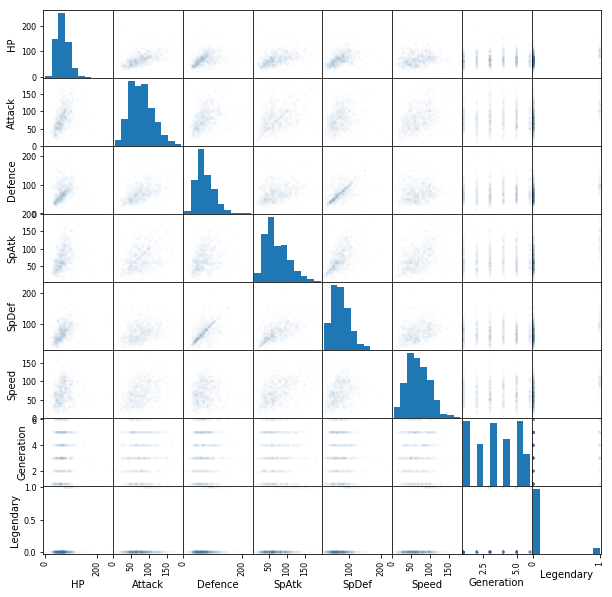

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataInfo, alpha = .01, figsize = (10, 10))
pass

Вычислим корреляцию параметров

In [25]:
dataInfo.corr()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defence,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
SpAtk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
SpDef,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Как видно из таблицы, сильно существенных зависимостей между параметрами таблицы нет (>0.5).   
Параметры Attack и SpAtk, Defence и SpDef имеют наибольшую зависимость между собой.  
Также видим, что легендарность покемонов зависит почти в равной степени от таких параметров, как: HP, Attack, Defence, SpAtk, SpDef и Speed. Но в большей степени от параметров SpAtk и SpDef.

Построим корреляцию для нелегендарных покемонов отдельно

In [26]:
dataInfo[dataInfo["Legendary"]==False].corr()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
HP,1.000000,0.377668,0.192426,0.299471,0.337606,0.109847,0.042132,NaN
Attack,0.377668,1.000000,0.437192,0.261879,0.211872,0.305346,0.020456,NaN
Defence,0.192426,0.437192,1.000000,0.186030,0.475241,-0.040796,0.026482,NaN
SpAtk,0.299471,0.261879,0.186030,1.000000,0.471164,0.393205,0.003415,NaN
SpDef,0.337606,0.211872,0.475241,0.471164,1.000000,0.212542,0.008990,NaN
Speed,0.109847,0.305346,-0.040796,0.393205,0.212542,1.000000,-0.041411,NaN
Generation,0.042132,0.020456,0.026482,0.003415,0.008990,-0.041411,1.000000,NaN
Legendary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь построим таблицу корреляций для легендарных покемонов

In [27]:
dataInfo[dataInfo["Legendary"]==True].corr()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
HP,1.000000,0.176166,0.076634,0.029604,0.016942,-0.137105,-0.017262,NaN
Attack,0.176166,1.000000,-0.210974,0.567287,-0.391433,0.269200,0.093102,NaN
Defence,0.076634,-0.210974,1.000000,-0.510352,0.377674,-0.527786,-0.017889,NaN
SpAtk,0.029604,0.567287,-0.510352,1.000000,-0.154694,0.310406,-0.032872,NaN
SpDef,0.016942,-0.391433,0.377674,-0.154694,1.000000,-0.493259,-0.113199,NaN
Speed,-0.137105,0.269200,-0.527786,0.310406,-0.493259,1.000000,-0.225116,NaN
Generation,-0.017262,0.093102,-0.017889,-0.032872,-0.113199,-0.225116,1.000000,NaN
Legendary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сравнивая 2 таблицы для легендарных и нелегендарных покемонов, видим, что зависимость Attack и Defence, Special Attack и Special Defence большая для нелегендарных покемонов, в то время как для легендарных покемонов наоборот.  
Параметры Attack и Special Attack, Defence и Special Defence достаточно зависимы для легендарных покемонов

Строим график по параметрам Attack и Defence для всех покемонов

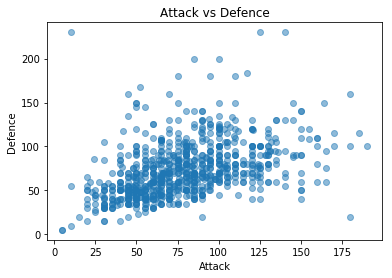

In [28]:
plt.plot(dataInfo['Attack'], dataInfo['Defence'], 'o', alpha = 0.5)
plt.xlabel('Attack')
plt.ylabel('Defence')
plt.title('Attack vs Defence')
pass

Строим график зависимости параметров Attack и Special Attack для всех покемонов

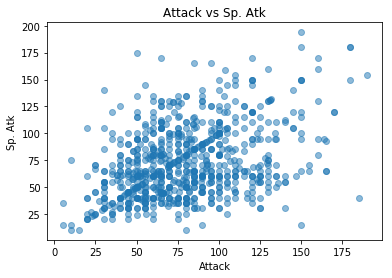

In [29]:
plt.plot(dataInfo['Attack'], dataInfo['SpAtk'], 'o', alpha = 0.5)
plt.xlabel('Attack')
plt.ylabel('Sp. Atk')
plt.title('Attack vs Sp. Atk')
pass

Строим графики зависимостей параметров Attack и Special Attack, Defence и Special Defence для легендарных покемонов

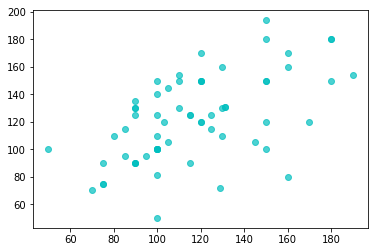

In [30]:
plt.scatter(dataInfo[dataInfo['Legendary'] == 1]['Attack'],
            dataInfo[dataInfo['Legendary'] == 1]['SpAtk'],
            alpha = 0.7,
            label = 'Legendary',
            color = 'c')

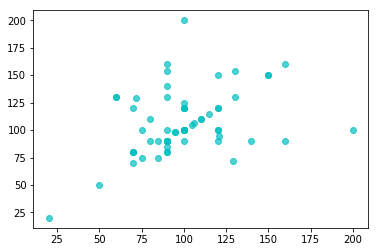

In [31]:
plt.scatter(dataInfo[dataInfo['Legendary'] == 1]['Defence'],
            dataInfo[dataInfo['Legendary'] == 1]['SpDef'],
            alpha = 0.7,
            label = 'Legendary',
            color = 'c')

Строим график зависимости параметров Defence и Special Defence для всех покемонов

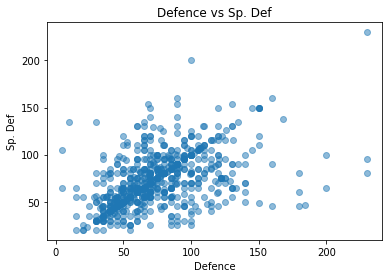

In [32]:
plt.plot(dataInfo['Defence'], dataInfo['SpDef'], 'o', alpha = 0.5)
plt.xlabel('Defence')
plt.ylabel('Sp. Def')
plt.title('Defence vs Sp. Def')
pass

Проверяем условия по последнему столбцу Legendary

In [33]:
dataInfo['Legendary'] == 1

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
770    False
771    False
772    False
773    False
774    False
775    False
776    False
777    False
778    False
779    False
780    False
781    False
782    False
783    False
784    False
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792     True
793     True
794     True
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

Диаграмма соотношения степени атаки и защиты для легендарных и нелегендарных покемонов

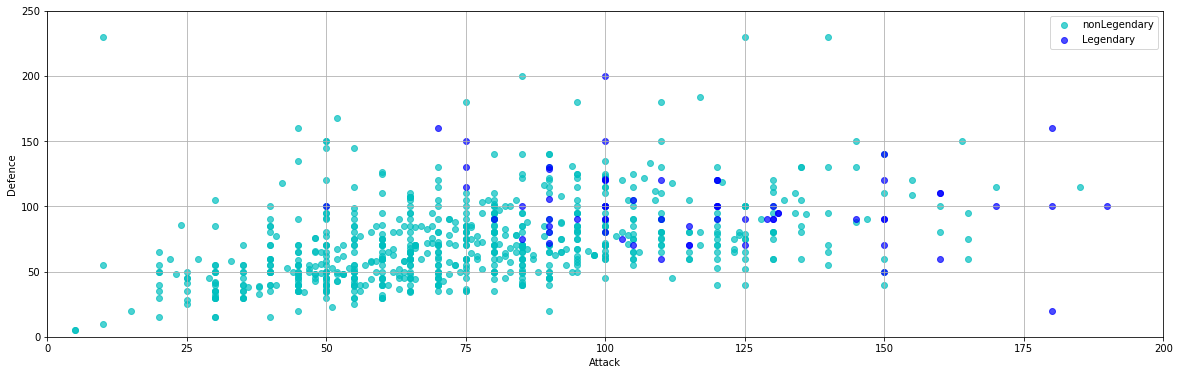

In [34]:
plt.figure(figsize = (20, 6))

plt.scatter(dataInfo[dataInfo['Legendary'] == 0]['Attack'],
            dataInfo[dataInfo['Legendary'] == 0]['Defence'],
            alpha = 0.7,
            label = 'nonLegendary',
            color = 'c')

plt.scatter(dataInfo[dataInfo['Legendary'] == 1]['Attack'],
            dataInfo[dataInfo['Legendary'] == 1]['Defence'],
            alpha = 0.7,
            label = 'Legendary',
            color = 'b')

plt.xlabel('Attack')
plt.xlim(0, 200)
plt.ylabel('Defence')
plt.ylim(0, 250)
plt.legend()
plt.grid()

Диаграмма соотношения степени специальных атаки и защиты для легендарных и нелегендарных покемонов

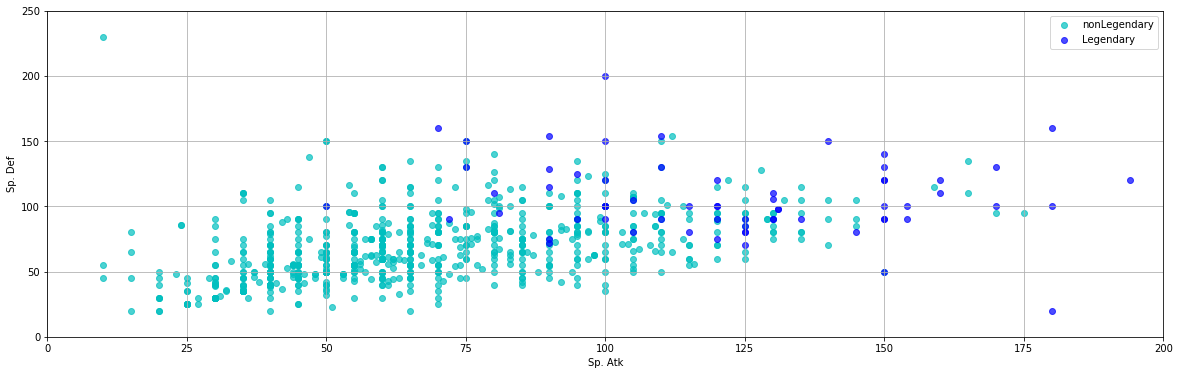

In [35]:
plt.figure(figsize = (20, 6))

plt.scatter(dataInfo[dataInfo['Legendary'] == 0]['SpAtk'],
            dataInfo[dataInfo['Legendary'] == 0]['SpDef'],
            alpha = 0.7,
            label = 'nonLegendary',
            color = 'c')

plt.scatter(dataInfo[dataInfo['Legendary'] == 1]['SpAtk'],
            dataInfo[dataInfo['Legendary'] == 1]['SpDef'],
            alpha = 0.7,
            label = 'Legendary',
            color = 'b')

plt.xlabel('Sp. Atk')
plt.xlim(0, 200)
plt.ylabel('Sp. Def')
plt.ylim(0, 250)
plt.legend()
plt.grid()

Диаграмма зависимости скорости покемона от поколения по делению на легендарных и нелегендарных покемонов

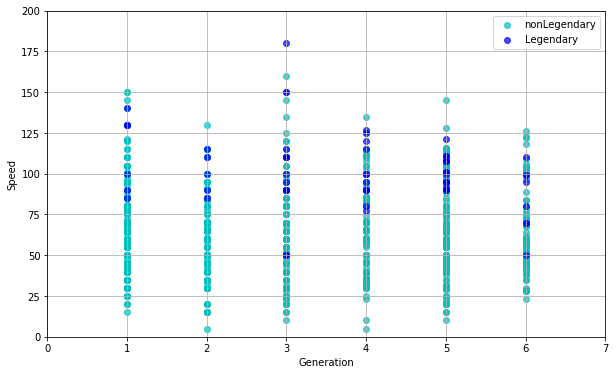

In [36]:
plt.figure(figsize = (10, 6))

plt.scatter(dataInfo[dataInfo['Legendary'] == 0]['Generation'],
            dataInfo[dataInfo['Legendary'] == 0]['Speed'],         
            alpha = 0.7,
            label = 'nonLegendary',
            color = 'c')

plt.scatter(dataInfo[dataInfo['Legendary'] == 1]['Generation'],
            dataInfo[dataInfo['Legendary'] == 1]['Speed'],         
            alpha = 0.7,
            label = 'Legendary',
            color = 'b')

plt.xlabel('Generation')
plt.xlim(0, 7)
plt.ylabel('Speed')
plt.ylim(0, 200)
plt.legend()
plt.grid()

Как видим из представленных диаграмм, количество быстрых покемонов больше среди легендарных покемонов

Также можно сделать вывод, что количество легендарных покемонов значительно меньше, чем нелегендарных

In [37]:
dataInfo.describe(include = ['int64'])

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [38]:
dataInfo.describe(include = 'all')

,Type1,Type2,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Legendary
count,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


Выведем уникальные значения в столбце

In [39]:
dataInfo['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [40]:
dataInfo['Type1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Очки жизни первых по списку покемонов в каждом поколении

In [41]:
for name in dataInfo['Generation'].unique():
    print(name, dataInfo['HP'][dataInfo['Generation'] == name].iloc[0])

1 45
2 45
3 40
4 55
5 100
6 56


In [42]:
dataInfo['Speed'].unique()

array([ 45,  60,  80,  65, 100,  43,  58,  78,  30,  70,  50,  35,  75,
       145,  56,  71, 101, 121,  72,  97,  55,  90, 110,  40,  41,  76,
        85,  20,  25,  95, 120, 115, 105, 150,  15, 130,  42,  67, 140,
        87,  63,  68,  93,  81,  48,  91,  33,   5,  83,  51,  61, 125,
       160,  28, 135,  10,  23,  32,  52, 180,  31,  36, 108,  66,  34,
        39, 112,  74,  84,  82, 102,  92,  47,  46,  86,  77, 127, 113,
       106,  64,  24,  29, 116, 114,  88,  69,  57,  98,  22,  44,  59,
        79, 103, 109,  38, 111, 128,  99,  73, 104, 122,  62, 126,  89,
        49, 118,  54, 123], dtype=int64)

# Задача

Предсказываем легендарность покемона.  
Выбираем именно признак легендарности, так как он напрямую зависит от таких остальных параметров таблицы, как: очки жизни, атаки, защиты и скорости. Одним из критериев легендарности является сумма атрибутов данных параметров (должна быть 580 и больше). Таким образом, наиболее мощные покемоны зачастую являются легендарными.

# Готовим данные

Задаем категориальные (у нас это типы object + bool) и числовые (int 64) признаки

In [43]:
numerical_columns   = [c for c in dataInfo.columns if dataInfo[c].dtype.name == 'int64']
categorical_columns = [c for c in dataInfo.columns if dataInfo[c].dtype.name != 'int64']
print(numerical_columns)
print(categorical_columns)

['HP', 'Attack', 'Defence', 'SpAtk', 'SpDef', 'Speed', 'Generation']
['Type1', 'Type2', 'Legendary']


Категориальные параметры нашей таблицы данных: Type1, Type2, Legendary  
Числовые параметры нашей таблицы данных: HP, Attack, Defence, SpAtk, SpDef, Speed, Generation  

Выведем уникальные значения для числовых признаков

In [44]:
for c in numerical_columns:
    print(c, dataInfo[c].unique())

HP [ 45  60  80  39  58  78  44  59  79  50  40  65  63  83  30  55  35  75
  70  90  46  61  81  95  38  73 115 140  10  25  52 105  85 250  20 130
  48 160  41  91 106 100 125 190 255  28  68 150  31   1  64  84 104  72
 144 170 110  43  66  86  99  76  53  37  77  67  97 111  49  71 103  57
 108 135  74  69 120 116  62  54  36  51 114 165 109  89  92  56  88 123
 101  82  42 126]
Attack [ 49  62  82 100  52  64  84 130 104  48  63  83 103  30  20  45  35  25
  90 150  60  80  56  81  85  55  75  47  92  57  72 102  70  41  76  50
  65  95 105 110  40 120  73   5 125  67 155  10 115 135 134 190  46  38
  58  33 185 164 160  51  71  91 140  43  78  15 165  68  23 145 180  89
 109  66  86  42  29  59  79  69  94 136  93  24 170 112  61 106 132 123
  88  53  98  77  27 117 108  44  87 147  74 124  97 129 128 107  36  22
  54 121 131]
Defence [ 49  63  83 123  43  58  78 111  65  80 100 120  35  55  50  30  40  75
  60  44  69  85 110  52  67  87  57  77  48  73  20  45  70  25  95  15
 

Выведем уникальные значения для категориальных признаков

In [45]:
for c in categorical_columns:
    print(c, dataInfo[c].unique())

Type1 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']
Type2 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
Legendary [False  True]


# Обрабатываем пропущенные значения

Когда в таблице имеются пропущенные значения, то наиболее эффективным методом является не удаление строк или столбцов с пустыми ячейками, а заполнение их средними значениями или самым популярным значением в столбце (для категориальных признаков).

Выведем средние значения по столбцам

In [46]:
dataInfo.median(axis = 0)

HP            65.0
Attack        75.0
Defence       70.0
SpAtk         65.0
SpDef         70.0
Speed         65.0
Generation     3.0
Legendary      0.0
dtype: float64

Выясним, есть ли пропущенные значения в таблице

In [47]:
dataInfo = dataInfo.fillna(dataInfo.median(axis = 0), axis = 0)

In [48]:
dataInfo[numerical_columns].count(axis = 0)

HP            800
Attack        800
Defence       800
SpAtk         800
SpDef         800
Speed         800
Generation    800
dtype: int64

In [49]:
dataInfo[categorical_columns].count(axis = 0)

Type1        800
Type2        414
Legendary    800
dtype: int64

In [50]:
dataInfo.describe(include = [object,bool])

,Type1,Type2,Legendary
count,800,414,800
unique,18,18,2
top,Water,Flying,False
freq,112,97,735


In [51]:
data_describe = dataInfo.describe(include = [object,bool])
for c in categorical_columns:
    dataInfo[c] = dataInfo[c].fillna(data_describe[c]['top'])

In [52]:
dataInfo.describe(include = [object,bool])

,Type1,Type2,Legendary
count,800,800,800
unique,18,18,2
top,Water,Flying,False
freq,112,483,735


Таким образом, мы заполнили все пустые ячейки в таблице данных

Проверка заполненности

In [53]:
dataInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
Type1         800 non-null object
Type2         800 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defence       800 non-null int64
SpAtk         800 non-null int64
SpDef         800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(2)
memory usage: 57.1+ KB


# Векторизация

Проводим изменения в категориальных параметрах

In [54]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Legendary'] ['Type1', 'Type2']


Legendary - бинарный признак  
Type1, Type2 - небинарные признаки

Сначала рассмотрим бинарный признак

In [55]:
dataInfo['Legendary'].unique()

array([False,  True], dtype=bool)

In [56]:
dataInfo.at[dataInfo['Legendary'] == False, 'Legendary'] = 0
dataInfo.at[dataInfo['Legendary'] == True,  'Legendary'] = 1
dataInfo['Legendary'].describe()

count       800
unique        2
top       False
freq        735
Name: Legendary, dtype: object

Теперь рассмотрим небинарные категориальные признаки  
Метод векторизации - признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.  

In [57]:
dataInfo['Type1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [58]:
dataInfo['Type2'].unique()

array(['Poison', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Например, в нашей задаче признак Type 1 принимает 18 различных значений

Заменим признак Type1 18ю признаками: Type1_Ghost, Type1_Grass, Type1_Ground ...

    Если признак Type1 принимает значение Ghost, то признак Type1_Ghost равен 1, а все остальные равны 0
    Если признак Type1 принимает значение Grass, то признак Type1_Grass равен 1, а все остальные равны 0 ...

Произведем векторизацию

In [59]:
data_nonbinary = pd.get_dummies(dataInfo[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Type1_Bug', 'Type1_Dark', 'Type1_Dragon', 'Type1_Electric',
       'Type1_Fairy', 'Type1_Fighting', 'Type1_Fire', 'Type1_Flying',
       'Type1_Ghost', 'Type1_Grass', 'Type1_Ground', 'Type1_Ice',
       'Type1_Normal', 'Type1_Poison', 'Type1_Psychic', 'Type1_Rock',
       'Type1_Steel', 'Type1_Water', 'Type2_Bug', 'Type2_Dark', 'Type2_Dragon',
       'Type2_Electric', 'Type2_Fairy', 'Type2_Fighting', 'Type2_Fire',
       'Type2_Flying', 'Type2_Ghost', 'Type2_Grass', 'Type2_Ground',
       'Type2_Ice', 'Type2_Normal', 'Type2_Poison', 'Type2_Psychic',
       'Type2_Rock', 'Type2_Steel', 'Type2_Water'],
      dtype='object')


# Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.  
Поэтому полезно производить нормализацию количественных признаков

In [60]:
data_numerical = dataInfo[numerical_columns]
data_numerical.describe()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [61]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [62]:
data_numerical.describe()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


# Объединяем все в одну таблицу

In [63]:
data = pd.concat((data_numerical, data_nonbinary, dataInfo[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(800, 44)


In [64]:
data.describe()

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Type1_Bug,Type1_Dark,Type1_Dragon,...,Type2_Ghost,Type2_Grass,Type2_Ground,Type2_Ice,Type2_Normal,Type2_Poison,Type2_Psychic,Type2_Rock,Type2_Steel,Type2_Water
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,0.086250,0.038750,0.040000,...,0.017500,0.031250,0.043750,0.017500,0.005000,0.042500,0.041250,0.017500,0.027500,0.017500
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.280908,0.193119,0.196082,...,0.131207,0.174101,0.204666,0.131207,0.070578,0.201853,0.198992,0.131207,0.163637,0.131207
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
data

,HP,Attack,Defence,SpAtk,SpDef,Speed,Generation,Type1_Bug,Type1_Dark,Type1_Dragon,...,Type2_Grass,Type2_Ground,Type2_Ice,Type2_Normal,Type2_Poison,Type2_Psychic,Type2_Rock,Type2_Steel,Type2_Water,Legendary
0,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,...,0,0,0,0,1,0,0,0,0,False
1,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,...,0,0,0,0,1,0,0,0,0,False
2,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,...,0,0,0,0,1,0,0,0,0,False
3,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,...,0,0,0,0,1,0,0,0,0,False
4,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,False
5,-0.440920,-0.462183,-0.508041,0.219422,-0.248033,0.403383,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,False
6,0.342329,0.154010,0.133324,1.105668,0.470644,1.091603,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,False
7,0.342329,1.571254,1.191576,1.747432,0.470644,1.091603,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,False
8,0.342329,0.770203,0.133324,2.633678,1.548659,1.091603,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,False
9,-0.989194,-0.955138,-0.283563,-0.697384,-0.283967,-0.869824,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [66]:
dataInfo['Legendary'].unique()

array([False,  True], dtype=bool)

# X и y

В X идут все столбцы таблицы кроме Legendary, в y - столбец Legendary

In [67]:
X = data.drop(('Legendary'), axis = 1) 
y = dataInfo['Legendary']
feature_names = X.columns

In [68]:
type(feature_names)

pandas.core.indexes.base.Index

In [69]:
feature_names

Index(['HP', 'Attack', 'Defence', 'SpAtk', 'SpDef', 'Speed', 'Generation',
       'Type1_Bug', 'Type1_Dark', 'Type1_Dragon', 'Type1_Electric',
       'Type1_Fairy', 'Type1_Fighting', 'Type1_Fire', 'Type1_Flying',
       'Type1_Ghost', 'Type1_Grass', 'Type1_Ground', 'Type1_Ice',
       'Type1_Normal', 'Type1_Poison', 'Type1_Psychic', 'Type1_Rock',
       'Type1_Steel', 'Type1_Water', 'Type2_Bug', 'Type2_Dark', 'Type2_Dragon',
       'Type2_Electric', 'Type2_Fairy', 'Type2_Fighting', 'Type2_Fire',
       'Type2_Flying', 'Type2_Ghost', 'Type2_Grass', 'Type2_Ground',
       'Type2_Ice', 'Type2_Normal', 'Type2_Poison', 'Type2_Psychic',
       'Type2_Rock', 'Type2_Steel', 'Type2_Water'],
      dtype='object')

In [70]:
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 43)
(800,)


In [71]:
type(X)

pandas.core.frame.DataFrame

In [72]:
type(y)

pandas.core.series.Series

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

600 200


Выборка делится на обучающую и тестовую.  
Процент тестовой выборки: 25%

In [74]:
N_train + N_test

800

# kNN

Берем классификатор с параметром k = 5

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Вычисление ошибки

In [77]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0266666666667 0.055


Используем другой способ подсчета ошибки (считаем ошибку на тестовой выборке данных)

In [78]:
err_test = 1 - knn.score(X_test, y_test)
err_test

0.055000000000000049

Построим матрицу визуализации прогноза классификатора.  
Значение в iой строке и jом столбце матрицы - число объектов, принадлежащих iой группе на самом деле и jой группе по прогнозу

In [79]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[181   6]
 [  5   8]]


# Подбор параметров

Нужно найти значение параметра k, которое бы минимизировало значение ошибки

In [80]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 7, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0533333333333 15


Параметр k = 15, посчитаем значения ошибки еще раз

In [81]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0516666666667 0.05


Таким образом, мы приходим к выводу, что ошибка предсказания легендарности покемона: 0.05

# ДЗ №2

In [82]:
from sklearn.datasets import load_digits
digits = load_digits()

Предсказываем легендарность покемона, используя нейронную сеть  
В X идут все столбцы таблицы кроме Legendary, в y - столбец Legendary

In [83]:
X = data.drop(('Legendary'), axis = 1) 
y = dataInfo['Legendary']

In [84]:
print(X.shape)
print(y.shape)

(800, 43)
(800,)


Разбиваем наши данные на обучающую и тестовую выборки

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

560 240


Процент тестовой выборки: 30%

### Обучаем классификатор

In [86]:
from sklearn.neural_network import MLPClassifier

Следующая нейронная сеть имеет 1 скрытый слой (мы добавляем скрытый слой с 50 нейронами)

In [87]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [88]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Выведем ошибки на обучающей и тестовой выборках  

In [89]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0625


Следующая нейронная сеть имеет уже 2 скрытых слоя (мы добавляем скрытые слои с 50 нейронами)

In [90]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,50), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [91]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Выведем ошибки на обучающей и тестовой выборках 

In [92]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0458333333333


Ошибка на обучающей выборке в нейронной сети с одним и двумя скрытыми слоями меньше, чем на тестовой, следовательно имеет место переобучение.  
При использовании нейронной сети с двумя скрытыми слоями ошибка меньше, чем у нейронной сети с одним скрытым слоем. Значит, используем двуслойную нейронную сеть. 

### Подбор гиперпараметров

#### Оптимальное значение alpha

Подбираем оптимальное значение параметра регуляризации alpha  
Используем нейронную сеть с 2 скрытыми слоями с 50 нейронами

In [93]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Строим график зависимости ошибок от alpha

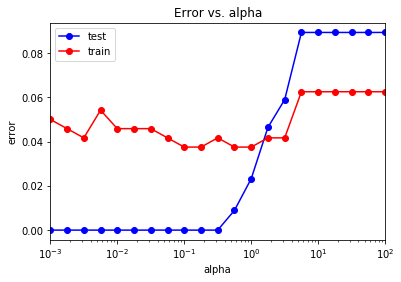

In [94]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение при значении alpha > 1.75 (ошибка на тестовой выборке больше, чем на обучающей)

In [95]:
print(alpha_arr)

[  1.00000000e-03   1.77827941e-03   3.16227766e-03   5.62341325e-03
   1.00000000e-02   1.77827941e-02   3.16227766e-02   5.62341325e-02
   1.00000000e-01   1.77827941e-01   3.16227766e-01   5.62341325e-01
   1.00000000e+00   1.77827941e+00   3.16227766e+00   5.62341325e+00
   1.00000000e+01   1.77827941e+01   3.16227766e+01   5.62341325e+01
   1.00000000e+02]


Минимальное значение ошибки

In [96]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0375


Находим оптимальное значение alpha

In [97]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.1         0.17782794  0.56234133  1.        ]


In [98]:
alpha_opt = alpha_opt[0]

#### Классификатор при оптимальном значении alpha

In [101]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0375


Видим, что при оптимальном значении alpha ошибка уменьшилась

#### Оптимальное количество нейронов

Используется alpha оптимальное. Нейронная сеть имеет 2 скрытых слоя.

In [103]:
neuron_arr = (10, 20, 50, 100, 200, 500, 700, 1000, 1500)
test_err = []
train_err = []
for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Строим график зависимости количества нейронов в скрытом слое от alpha (используем оптимальное значение alpha)

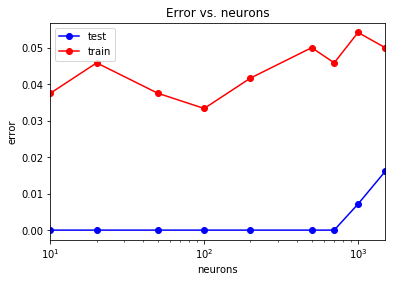

In [104]:
plt.semilogx(neuron_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neuron_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки

In [105]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0333333333333


Наблюдаем, что наименьшая ошибка получается при использовании от 10 до 700 нейронов.  
Оптимальное значение - 100 нейронов.